# Sentimen Analysis #PonPapua Menggunakan SVM
Data yang digunakan diambil dari crawling twitter dengan hashtag #PonPapua

## Preparing Dataset

In [ ]:
import pandas as pd
# Creating a pandas dataframe from reviews.txt file
data = pd.read_csv('ponpapua.csv')
data.head()

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,1448186905195995136,1448186905195995136,1.634110e+12,2021-10-13 07:20:38,0,NaN,Jawa Barat berhasil menambah pundi-pundi medal...,in,"['ponxx', 'ponpapua', 'jabar', 'dkijakarta', '...",[],907810884226973697,907810884226973697,KreatifsultanId,SULTANTV,3,7,https://twitter.com/KreatifsultanId/status/144...,[],[],1,https://pbs.twimg.com/ext_tw_video_thumb/14481...,False,0,0,0,NaN,#Ponpapua,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1,1448181072311644165,1448181072311644165,1.634108e+12,2021-10-13 06:57:28,0,NaN,Cabor Volly Pantai PON XX Papua mantapun #PONX...,in,"['ponxxpapua2021', 'torangbisa', 'ponpapua', '...",[],3310025106,3310025106,bodelisme,bodelism,3,6,https://twitter.com/bodelisme/status/144818107...,[],['https://pbs.twimg.com/media/FBj5AofVcAA1iz_....,1,https://pbs.twimg.com/media/FBj5AofVcAA1iz_.jpg,False,0,0,0,NaN,#Ponpapua,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,2,1448180129352454151,1448180129352454151,1.634108e+12,2021-10-13 06:53:43,0,NaN,"Warna lapangan nya biru bikin seru, PON XX Pap...",in,"['ponxxpapua2021', 'torangbisa', 'ponpapua', '...",[],1434182335621001217,1434182335621001217,elisesulastri,elis sulastri,3,6,https://twitter.com/elisesulastri/status/14481...,[],['https://pbs.twimg.com/media/FBj4JyrVgAI-jza....,1,https://pbs.twimg.com/media/FBj4JyrVgAI-jza.jpg,False,0,0,0,NaN,#Ponpapua,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,3,1448176464000536580,1448176464000536580,1.634107e+12,2021-10-13 06:39:09,0,NaN,Emas pertama Papua dari cabang atletik PON Pap...,in,['ponpapua'],[],154102750,154102750,Beritasatu,BeritaSatu,3,6,https://twitter.com/Beritasatu/status/14481764...,['https://www.beritasatu.com/olahraga/840257/e...,[],0,NaN,False,2,0,0,NaN,#Ponpapua,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,4,1448176114434654212,1448176114434654212,1.634107e+12,2021-10-13 06:37:46,0,NaN,"""Segala sesuatu yang berharga dalam hidup dica...",in,"['ponxxpapua2021', 'torangbisa', 'ponpapua', '...",[],1436277890690129922,1436277890690129922,PapuaFromPapua,Missael From Papua,3,6,https://twitter.com/PapuaFromPapua/status/1448...,[],['https://pbs.twimg.com/media/FBj0cM-UcAMnNaj....,1,https://pbs.twimg.com/media/FBj0cM-UcAMnNaj.jpg,False,0,0,0,NaN,#Ponpapua,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
#Select coloum except 'tweet'
delete_data = data.loc[:, data.columns != "tweet"]
delete_data.columns


Index(['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'date', 'timezone',
       'place', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [ ]:
# Dropping coloum
mydata = data.drop(delete_data.columns, axis=1)
mydata.head()

,tweet
0,Jawa Barat berhasil menambah pundi-pundi medal...
1,Cabor Volly Pantai PON XX Papua mantapun #PONX...
2,"Warna lapangan nya biru bikin seru, PON XX Pap..."
3,Emas pertama Papua dari cabang atletik PON Pap...
4,"""Segala sesuatu yang berharga dalam hidup dica..."


## Preprocessing

### Cleaning the text

In [ ]:
import re
import string

# Define a function to clean the text
def clean(text):
 # Removes all special characters and numericals leaving the alphabets
 text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
 text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
 text = re.sub(r'RT[\s]', '', text) # remove RT
 text = re.sub(r"http\S+", '', text) # remove link
 text = re.sub(r'[0-9]+', '', text) # remove numbers

 text = text.replace('\n', ' ') # replace new line into space
 text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
 text = text.strip(' ') # remove characters space from both left and right text
 return text
# Cleaning the text in the review column
mydata['Cleaned Reviews'] = mydata['tweet'].apply(clean)
mydata.head()


,tweet,Cleaned Reviews
0,Jawa Barat berhasil menambah pundi-pundi medal...,Jawa Barat berhasil menambah pundipundi medali...
1,Cabor Volly Pantai PON XX Papua mantapun #PONX...,Cabor Volly Pantai PON XX Papua mantapun
2,"Warna lapangan nya biru bikin seru, PON XX Pap...",Warna lapangan nya biru bikin seru PON XX Papua
3,Emas pertama Papua dari cabang atletik PON Pap...,Emas pertama Papua dari cabang atletik PON Pap...
4,"""Segala sesuatu yang berharga dalam hidup dica...",Segala sesuatu yang berharga dalam hidup dicap...


### Steps 2-4: CaseFolding, Tokenization, POS tagging, stopwords removal

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower() 
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text) 
    return text

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
 tags = pos_tag(word_tokenize(text))
 newlist = []
 for word, tag in tags:
  if word.lower() not in set(stopwords.words('english')):
    newlist.append(tuple([word, pos_dict.get(tag[0])]))
 return newlist


def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered 
    return text
    
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
tweets = mydata

tweets['casefoldingText'] = tweets['Cleaned Reviews'].apply(casefoldingText)
tweets['tokenizingText'] = tweets['casefoldingText'].apply(tokenizingText)
tweets['POS tagged'] = tweets['casefoldingText'].apply(token_stop_pos)
tweets['filteringText'] = tweets['tokenizingText'].apply(filteringText)

In [ ]:
tweets.head()

,tweet,Cleaned Reviews,casefoldingText,tokenizingText,POS tagged,filteringText
0,Jawa Barat berhasil menambah pundi-pundi medal...,Jawa Barat berhasil menambah pundipundi medali...,jawa barat berhasil menambah pundipundi medali...,"[jawa, barat, berhasil, menambah, pundipundi, ...","[(jawa, n), (barat, n), (berhasil, n), (menamb...","[jawa, barat, berhasil, menambah, pundipundi, ..."
1,Cabor Volly Pantai PON XX Papua mantapun #PONX...,Cabor Volly Pantai PON XX Papua mantapun,cabor volly pantai pon xx papua mantapun,"[cabor, volly, pantai, pon, xx, papua, mantapun]","[(cabor, n), (volly, r), (pantai, a), (pon, n)...","[cabor, volly, pantai, pon, xx, papua, mantapun]"
2,"Warna lapangan nya biru bikin seru, PON XX Pap...",Warna lapangan nya biru bikin seru PON XX Papua,warna lapangan nya biru bikin seru pon xx papua,"[warna, lapangan, nya, biru, bikin, seru, pon,...","[(warna, n), (lapangan, a), (nya, a), (biru, n...","[warna, lapangan, nya, biru, bikin, seru, pon,..."
3,Emas pertama Papua dari cabang atletik PON Pap...,Emas pertama Papua dari cabang atletik PON Pap...,emas pertama papua dari cabang atletik pon pap...,"[emas, pertama, papua, dari, cabang, atletik, ...","[(emas, a), (pertama, n), (papua, n), (dari, n...","[emas, papua, cabang, atletik, pon, papua, dis..."
4,"""Segala sesuatu yang berharga dalam hidup dica...",Segala sesuatu yang berharga dalam hidup dicap...,segala sesuatu yang berharga dalam hidup dicap...,"[segala, sesuatu, yang, berharga, dalam, hidup...","[(segala, n), (sesuatu, n), (yang, n), (berhar...","[berharga, hidup, dicapai, kerja, keras, denni..."


### step 5: Obtaining the stem words

In [ ]:
def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text


In [ ]:
tweets['stemmingText'] = tweets['filteringText'].apply(stemmingText)
tweets['text_preprocessed'] = tweets['stemmingText'].apply(toSentence)

In [ ]:
tweets.head()

,tweet,Cleaned Reviews,casefoldingText,tokenizingText,POS tagged,filteringText,stemmingText,text_preprocessed
0,Jawa Barat berhasil menambah pundi-pundi medal...,Jawa Barat berhasil menambah pundipundi medali...,jawa barat berhasil menambah pundipundi medali...,"[jawa, barat, berhasil, menambah, pundipundi, ...","[(jawa, n), (barat, n), (berhasil, n), (menamb...","[jawa, barat, berhasil, menambah, pundipundi, ...","[jawa, barat, hasil, tambah, pundipundi, medal...",jawa barat hasil tambah pundipundi medali capa...
1,Cabor Volly Pantai PON XX Papua mantapun #PONX...,Cabor Volly Pantai PON XX Papua mantapun,cabor volly pantai pon xx papua mantapun,"[cabor, volly, pantai, pon, xx, papua, mantapun]","[(cabor, n), (volly, r), (pantai, a), (pon, n)...","[cabor, volly, pantai, pon, xx, papua, mantapun]","[cabor, volly, pantai, pon, xx, papua, manta]",cabor volly pantai pon xx papua manta
2,"Warna lapangan nya biru bikin seru, PON XX Pap...",Warna lapangan nya biru bikin seru PON XX Papua,warna lapangan nya biru bikin seru pon xx papua,"[warna, lapangan, nya, biru, bikin, seru, pon,...","[(warna, n), (lapangan, a), (nya, a), (biru, n...","[warna, lapangan, nya, biru, bikin, seru, pon,...","[warna, lapang, nya, biru, bikin, seru, pon, x...",warna lapang nya biru bikin seru pon xx papua
3,Emas pertama Papua dari cabang atletik PON Pap...,Emas pertama Papua dari cabang atletik PON Pap...,emas pertama papua dari cabang atletik pon pap...,"[emas, pertama, papua, dari, cabang, atletik, ...","[(emas, a), (pertama, n), (papua, n), (dari, n...","[emas, papua, cabang, atletik, pon, papua, dis...","[emas, papua, cabang, atletik, pon, papua, sam...",emas papua cabang atletik pon papua sambut gem...
4,"""Segala sesuatu yang berharga dalam hidup dica...",Segala sesuatu yang berharga dalam hidup dicap...,segala sesuatu yang berharga dalam hidup dicap...,"[segala, sesuatu, yang, berharga, dalam, hidup...","[(segala, n), (sesuatu, n), (yang, n), (berhar...","[berharga, hidup, dicapai, kerja, keras, denni...","[harga, hidup, capai, kerja, keras, dennis, pr...",harga hidup capai kerja keras dennis prager


## Determine Sentiment Polarity of Tweets with Indonesia Sentiment Lexicon

In [ ]:
# Determine sentiment polarity of tweets using indonesia sentiment lexicon (source : https://github.com/fajri91/InSet)

# Loads lexicon positive and negative data
lexicon_positive = dict()
import csv
with open('lexicon_positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = row[1]

lexicon_negative = dict()
import csv
with open('lexicon_negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = row[1]
        
# Function to determine sentiment polarity of tweets        
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + int(lexicon_positive[word])
    for word in text:
        if (word in lexicon_negative):
            score = score + int(lexicon_negative[word])
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

In [ ]:
# Results from determine sentiment polarity of tweets

results = tweets['stemmingText'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
tweets['polarity_score'] = results[0]
tweets['polarity'] = results[1]
print(tweets['polarity'].value_counts())

positive    262
negative    148
neutral     107
Name: polarity, dtype: int64


([<matplotlib.patches.Wedge at 0x7f0de6bd9d50>,
 [Text(-0.02339310990828482, 1.099751227509576, 'positive'),
  Text(-0.6471043729186393, -0.8895256772851331, 'negative'),
  Text(0.8755629146062198, -0.6658750502656348, 'neutral')],
 [Text(-0.012759878131791719, 0.599864305914314, '50.7%'),
  Text(-0.35296602159198504, -0.4851958239737089, '28.6%'),
  Text(0.4775797716033926, -0.36320457287216434, '20.7%')])

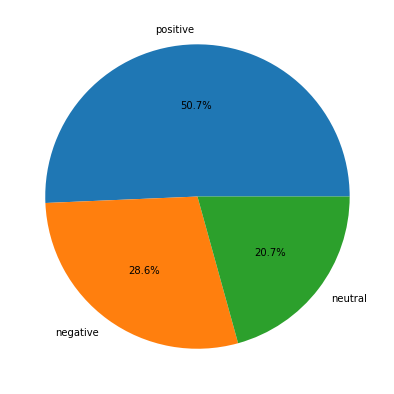

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

stw_counts= tweets['polarity'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(stw_counts.values, labels = stw_counts.index, autopct='%1.1f%%', shadow=False)
# plt.legend()


## Word Cloud

In [ ]:
# Function to group all positive/negative words
def words_with_sentiment(text):
    positive_words=[]
    negative_words=[]
    for word in text:
        score_pos = 0
        score_neg = 0
        if (word in lexicon_positive):
            score_pos = int(lexicon_positive[word])
        if (word in lexicon_negative):
            score_neg = int(lexicon_negative[word])
        
        if (score_pos + score_neg > 0):
            positive_words.append(word)
        elif (score_pos + score_neg < 0):
            negative_words.append(word)
            
    return positive_words, negative_words

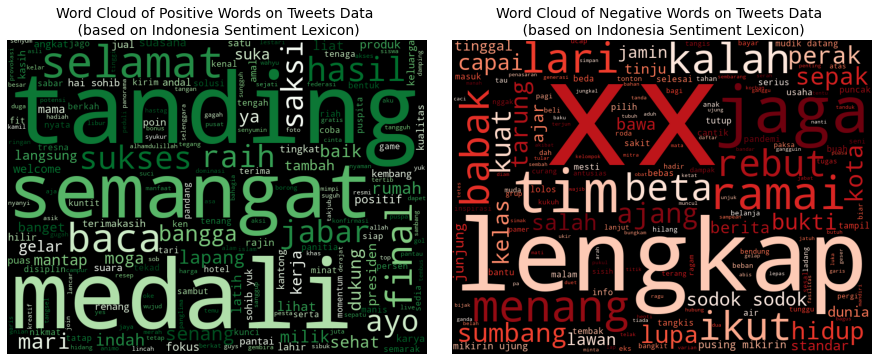

In [ ]:
# Visualize positive and Negative word cloud

sentiment_words = tweets['stemmingText'].apply(words_with_sentiment)
sentiment_words = list(zip(*sentiment_words))
positive_words = sentiment_words[0]
negative_words = sentiment_words[1]

fig, ax = plt.subplots(1, 2,figsize = (12, 10))
list_words_postive=''
for row_word in positive_words:
    for word in row_word:
        list_words_postive += ' '+(word)
wordcloud_positive = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Greens'
                               , min_font_size = 10).generate(list_words_postive)
ax[0].set_title('Word Cloud of Positive Words on Tweets Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[0].grid(False)
ax[0].imshow((wordcloud_positive))
fig.tight_layout(pad=0)
ax[0].axis('off')

list_words_negative=''
for row_word in negative_words:
    for word in row_word:
        list_words_negative += ' '+(word)
wordcloud_negative = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Reds'
                               , min_font_size = 10).generate(list_words_negative)
ax[1].set_title('Word Cloud of Negative Words on Tweets Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[1].grid(False)
ax[1].imshow((wordcloud_negative))
fig.tight_layout(pad=0)
ax[1].axis('off')

plt.show()

# Sentiment Analysis Using Support Vector Machine (SVM)

## Preparing Dataset

In [ ]:
df_tweets = tweets[['text_preprocessed', 'polarity']]
df_tweets = df_tweets.rename(columns={'polarity': 'sentiment'})
df_tweets = df_tweets.rename(columns={'text_preprocessed': 'tweet'})
df_tweets.head()

,tweet,sentiment
0,jawa barat hasil tambah pundipundi medali capa...,positive
1,cabor volly pantai pon xx papua manta,neutral
2,warna lapang nya biru bikin seru pon xx papua,positive
3,emas papua cabang atletik pon papua sambut gem...,positive
4,harga hidup capai kerja keras dennis prager,positive


In [ ]:
#sentiment count
df_tweets['sentiment'].value_counts()

positive    262
negative    148
neutral     107
Name: sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


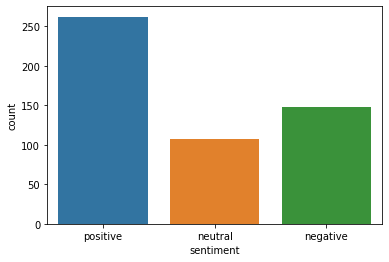

In [ ]:
import seaborn as sns
sns.countplot(df_tweets.sentiment)

## handling imbalanced data

In [ ]:
def oversample(df):
    import seaborn as sns
    classes = df.sentiment.value_counts().to_dict()
    most = max(classes.values())
    classes_list = []
    for key in classes:
        classes_list.append(df[df['sentiment'] == key]) 
    classes_sample = []
    for i in range(1,len(classes_list)):
        classes_sample.append(classes_list[i].sample(most, replace=True))
    df_maybe = pd.concat(classes_sample)
    final_df = pd.concat([df_maybe,classes_list[0]], axis=0)
    final_df = final_df.reset_index(drop=True)
    df_tweets = final_df
    
    return df_tweets

In [ ]:
df = oversample(df_tweets)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


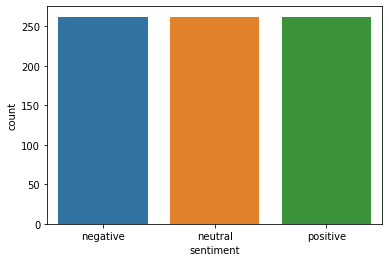

In [ ]:
sns.countplot(df.sentiment)

## Preprocessing Data Text

In [ ]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(df,test_size = 0.2,random_state=0,stratify = df.sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (628, 2)
valid shape :  (158, 2)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('indonesian'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.tweet.values)
X_valid = vectorizer.transform(valid.tweet.values)

y_train = train.sentiment.values
y_valid = valid.sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (628, 934)
X_train.shape :  (158, 934)
y_train.shape :  (628,)
y_valid.shape :  (158,)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


## Model SVM

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

Training accuracy Score    :  0.9872611464968153
Validation accuracy Score :  0.8987341772151899
              precision    recall  f1-score   support

    negative       0.85      0.98      0.91        46
     neutral       0.96      0.89      0.93        57
    positive       0.88      0.84      0.86        55

    accuracy                           0.90       158
   macro avg       0.90      0.90      0.90       158
weighted avg       0.90      0.90      0.90       158



## Predict with Other Data

In [ ]:
# Initializing and preprocessing new text data
otherData = pd.DataFrame()
otherData['text'] = ['BANGKIT DAN SATUKAN TEKAD SEMANGAT!  #PeparnasPapua #PeparnasPapua2021 #PONXXPapua2021 #TorangBisa #PONPapua #PONPapua2021  https://t.co/kiElG5FUCp',
                     'APA SAJA YA CABOR PEPARNAS TERBARU ?!  #PeparnasPapua #PeparnasPapua2021 #PONXXPapua2021 #TorangBisa #PONPapua #PONPapua2021  https://t.co/22FdfXohR9' 
                    ]

otherData['text_clean'] = otherData['text'].apply(clean)
otherData['text_clean'] = otherData['text_clean'].apply(casefoldingText)
otherData.drop(['text'], axis = 1, inplace = True)

otherData['text_preprocessed'] = otherData['text_clean'].apply(tokenizingText)
otherData['text_preprocessed'] = otherData['text_preprocessed'].apply(filteringText)
otherData['text_preprocessed'] = otherData['text_preprocessed'].apply(stemmingText)
otherData

,text_clean,text_preprocessed
0,bangkit dan satukan tekad semangat,"[bangkit, satu, tekad, semangat]"
1,apa saja ya cabor peparnas terbaru,"[ya, cabor, peparnas, baru]"


In [ ]:
# Preprocessing text data

# Make text preprocessed (tokenized) to untokenized with toSentence Function
X_otherData = otherData['text_preprocessed'].apply(toSentence)
X_otherData = vectorizer.transform(X_otherData.values)

In [ ]:
# Results from prediction sentiment on text data

y_pred_otherData = svc.predict(X_otherData)
y_pred_otherData
otherData['Result Prediction'] = y_pred_otherData
otherData

,text_clean,text_preprocessed,Result Prediction
0,bangkit dan satukan tekad semangat,"[bangkit, satu, tekad, semangat]",positive
1,apa saja ya cabor peparnas terbaru,"[ya, cabor, peparnas, baru]",neutral
